<a href="https://colab.research.google.com/github/ishikaww/SIH-plankton/blob/main/notebooks/train-yolov8n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Sep 16 18:49:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

To install YOL0v8, run the following command:

In [3]:
!pip install ultralytics==8.2.103 -q

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.7/112.6 GB disk)


Now, we can import YOLOv8 into our Notebook:

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
# Create datasets folder and move into it
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

# Install roboflow
!pip install roboflow --quiet

import roboflow

# Login to Roboflow (this will ask for your API key)
roboflow.login()

# Initialize Roboflow
rf = roboflow.Roboflow()

# Load your specific project and dataset
project = rf.workspace("plant-disease-zbikw").project("plankton-detection-sih-d7byp")

# Download the dataset in YOLOv8 format
dataset = project.version(7).download("yolov8")

/content/datasets
You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


In [7]:
import yaml

with open(f'{dataset.location}/data.yaml', 'r') as f:
    data = yaml.safe_load(f)
data['train'] = '../train/images'
data['val'] = '../valid/images'
data['test'] = '../test/images'
if 'path' in data:
  del data['path']
with open(f'{dataset.location}/data.yaml', 'w') as f:
    yaml.dump(data, f, sort_keys=False)

## Train a YOLOv8 OBB Object Detection Model

With our dataset downloaded, we can now train a YOLOv8 OBB object detection model. Run the code snippet below to start training your model:

In [9]:
from ultralytics import YOLO

# Regular detection model
model = YOLO('yolov8n.pt')  # or yolov8s.pt for better accuracy

# Train
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=100,
    imgsz=640
)


New https://pypi.org/project/ultralytics/8.3.200 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Plankton-Detection-SIH-7/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

train: Scanning /content/datasets/Plankton-Detection-SIH-7/train/labels.cache... 8088 images, 129 backgrounds, 0 corrupt: 100%|██████████| 8088/8088 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/datasets/Plankton-Detection-SIH-7/valid/labels.cache... 1008 images, 18 backgrounds, 0 corrupt: 100%|██████████| 1008/1008 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.59G      1.181      4.949      1.581         16        640: 100%|██████████| 506/506 [02:19<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]

                   all       1008        998    0.00995       0.58     0.0271     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.44G      1.146       4.16       1.51         23        640: 100%|██████████| 506/506 [02:14<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.09it/s]


                   all       1008        998     0.0128      0.853     0.0701     0.0446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.44G      1.162      3.666      1.482         19        640: 100%|██████████| 506/506 [02:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.14it/s]


                   all       1008        998     0.0123      0.219     0.0205     0.0105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.43G      1.139      3.445      1.436         18        640: 100%|██████████| 506/506 [02:12<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.24it/s]


                   all       1008        998      0.358      0.346      0.174      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.44G      1.108      3.202      1.405         24        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.51it/s]


                   all       1008        998       0.33      0.185     0.0947     0.0684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.43G      1.074      2.989      1.378         16        640: 100%|██████████| 506/506 [02:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.64it/s]


                   all       1008        998      0.331      0.321      0.188      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.44G      1.057      2.817      1.366         25        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]


                   all       1008        998      0.326      0.365      0.253      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.45G      1.044      2.702      1.353         22        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.14it/s]


                   all       1008        998      0.345       0.39      0.272      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.44G      1.034       2.61      1.341         20        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.16it/s]


                   all       1008        998       0.32       0.36      0.245      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.43G      1.017      2.528      1.333         24        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.42it/s]


                   all       1008        998      0.336      0.385      0.287      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.44G      1.003      2.454      1.324         17        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.64it/s]


                   all       1008        998      0.347      0.479      0.352      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.43G      0.999      2.415      1.323         21        640: 100%|██████████| 506/506 [02:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.74it/s]


                   all       1008        998      0.328      0.432       0.36      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.44G     0.9975      2.384      1.321         22        640: 100%|██████████| 506/506 [02:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.11it/s]


                   all       1008        998      0.389      0.213      0.171      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.43G     0.9882      2.324      1.316         22        640: 100%|██████████| 506/506 [02:10<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.17it/s]


                   all       1008        998      0.474      0.449      0.428      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.44G     0.9808      2.295      1.306         28        640: 100%|██████████| 506/506 [02:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.16it/s]


                   all       1008        998      0.351      0.467      0.374       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.43G     0.9751      2.262      1.305         21        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.65it/s]


                   all       1008        998      0.351      0.467      0.393      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.44G       0.97      2.235      1.301         22        640: 100%|██████████| 506/506 [02:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.74it/s]


                   all       1008        998      0.373      0.514      0.433      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.43G     0.9645      2.203      1.301         17        640: 100%|██████████| 506/506 [02:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.69it/s]


                   all       1008        998       0.45      0.474      0.447      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.44G     0.9558      2.191      1.292         19        640: 100%|██████████| 506/506 [02:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.36it/s]


                   all       1008        998      0.468      0.505      0.499      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.43G     0.9556      2.161      1.291         23        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.11it/s]


                   all       1008        998      0.459      0.515      0.503      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.44G     0.9482      2.128      1.287         20        640: 100%|██████████| 506/506 [02:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.27it/s]


                   all       1008        998      0.457      0.578      0.566      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.43G     0.9454       2.11      1.285         23        640: 100%|██████████| 506/506 [02:10<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.48it/s]


                   all       1008        998       0.57      0.459      0.523      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.44G     0.9439      2.098      1.284         20        640: 100%|██████████| 506/506 [02:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.47it/s]


                   all       1008        998      0.406      0.487      0.454      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.43G      0.939      2.052      1.279         19        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]


                   all       1008        998      0.462      0.557      0.519        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.44G     0.9275      2.044      1.278         19        640: 100%|██████████| 506/506 [02:10<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.28it/s]


                   all       1008        998      0.326      0.292      0.293      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.43G     0.9358       2.04       1.28         21        640: 100%|██████████| 506/506 [02:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.77it/s]


                   all       1008        998      0.505      0.585      0.588      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.44G     0.9341      2.011      1.278         24        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.45it/s]


                   all       1008        998      0.508      0.591      0.593      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.43G     0.9272      1.995      1.271         19        640: 100%|██████████| 506/506 [02:10<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.16it/s]


                   all       1008        998      0.501      0.487      0.505      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.44G     0.9282      1.984      1.276         17        640: 100%|██████████| 506/506 [02:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.12it/s]


                   all       1008        998      0.453      0.609      0.567      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.43G      0.922      1.962      1.275         16        640: 100%|██████████| 506/506 [02:10<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.64it/s]


                   all       1008        998      0.443      0.524      0.501      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.44G     0.9179      1.946      1.269         21        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.66it/s]


                   all       1008        998      0.475      0.513       0.53      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.43G     0.9145       1.92       1.27         20        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.19it/s]


                   all       1008        998      0.518      0.624      0.609      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.44G      0.908      1.904       1.26         23        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.12it/s]


                   all       1008        998      0.551      0.616      0.641      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.43G     0.9127      1.902      1.265         22        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.19it/s]


                   all       1008        998      0.473      0.616      0.602      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.44G     0.9033      1.877       1.26         22        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.66it/s]


                   all       1008        998      0.554      0.632      0.662      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.44G     0.9007      1.848      1.257         16        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.67it/s]


                   all       1008        998      0.554      0.579      0.625      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.44G      0.902      1.855      1.258         19        640: 100%|██████████| 506/506 [02:10<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.13it/s]


                   all       1008        998      0.484      0.578      0.587      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.43G     0.9027      1.847      1.257         16        640: 100%|██████████| 506/506 [02:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.24it/s]


                   all       1008        998       0.58      0.622       0.66      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.44G     0.9024      1.825      1.261         18        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.67it/s]


                   all       1008        998      0.578      0.601       0.64      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.43G     0.8919      1.804      1.245         23        640: 100%|██████████| 506/506 [02:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.69it/s]


                   all       1008        998      0.555      0.586      0.623      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.44G     0.8949      1.792      1.254         18        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.23it/s]


                   all       1008        998      0.614      0.632      0.677      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.43G     0.8968      1.784      1.252         20        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]


                   all       1008        998      0.535      0.578      0.603       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.44G     0.8843      1.781      1.247         24        640: 100%|██████████| 506/506 [02:10<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.57it/s]


                   all       1008        998      0.569      0.586      0.635        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.43G     0.8891      1.748      1.248         22        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.68it/s]


                   all       1008        998      0.552      0.676      0.692      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.44G     0.8806      1.729      1.243         17        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.16it/s]


                   all       1008        998      0.579      0.706      0.706      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.43G     0.8792       1.72      1.244         23        640: 100%|██████████| 506/506 [02:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]


                   all       1008        998       0.59      0.623      0.659      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.44G     0.8786      1.724      1.245         24        640: 100%|██████████| 506/506 [02:12<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.23it/s]


                   all       1008        998      0.554      0.613      0.635      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.43G     0.8788      1.715      1.246         23        640: 100%|██████████| 506/506 [02:11<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.61it/s]


                   all       1008        998      0.643      0.647        0.7      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.44G     0.8731      1.688       1.24         21        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.72it/s]


                   all       1008        998      0.538      0.608      0.641      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.43G     0.8812      1.688      1.244         22        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]


                   all       1008        998      0.587      0.714      0.714      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.44G     0.8702      1.672       1.24         22        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.12it/s]


                   all       1008        998       0.57      0.643      0.684      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.43G     0.8759      1.667      1.242         21        640: 100%|██████████| 506/506 [02:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.24it/s]


                   all       1008        998      0.646      0.665      0.719      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.44G     0.8753       1.66      1.239         19        640: 100%|██████████| 506/506 [02:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.53it/s]


                   all       1008        998      0.662      0.607      0.696       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.43G     0.8651      1.634      1.234         22        640: 100%|██████████| 506/506 [02:12<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.63it/s]


                   all       1008        998      0.571      0.676      0.684      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.44G     0.8656      1.625      1.241         18        640: 100%|██████████| 506/506 [02:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.42it/s]


                   all       1008        998      0.627      0.658      0.701      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.45G     0.8625      1.621      1.238         21        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.12it/s]


                   all       1008        998      0.599      0.636       0.68       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.44G     0.8619      1.614      1.232         20        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.19it/s]


                   all       1008        998      0.618      0.631      0.674      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.43G     0.8624        1.6      1.235         18        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.55it/s]


                   all       1008        998       0.63       0.66      0.707      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.44G     0.8608      1.585      1.229         25        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.67it/s]


                   all       1008        998       0.66      0.694      0.736      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.43G     0.8534      1.566      1.226         21        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.28it/s]


                   all       1008        998      0.616      0.712      0.732      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.44G     0.8578      1.558      1.231         19        640: 100%|██████████| 506/506 [02:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.21it/s]


                   all       1008        998      0.672      0.685      0.739      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.43G     0.8573      1.557       1.23         22        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.47it/s]


                   all       1008        998       0.66      0.683       0.73      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.44G     0.8515      1.552      1.229         19        640: 100%|██████████| 506/506 [02:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.80it/s]


                   all       1008        998      0.596      0.736      0.737      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.43G     0.8514      1.537      1.228         14        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.26it/s]


                   all       1008        998      0.668      0.654      0.714      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.44G     0.8478      1.539      1.227         24        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.11it/s]


                   all       1008        998      0.629      0.697      0.724      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.43G     0.8451      1.536      1.226         25        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.14it/s]


                   all       1008        998      0.667      0.711      0.753      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.44G     0.8479      1.504      1.225         17        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.27it/s]


                   all       1008        998      0.646      0.734      0.751      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.43G      0.841      1.497      1.217         19        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.69it/s]


                   all       1008        998      0.657      0.725      0.753       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.44G      0.841      1.499       1.22         23        640: 100%|██████████| 506/506 [02:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.63it/s]


                   all       1008        998      0.654      0.727      0.746      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.43G     0.8397       1.48      1.221         25        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.17it/s]


                   all       1008        998      0.678      0.724      0.756      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.44G     0.8374      1.476      1.216         16        640: 100%|██████████| 506/506 [02:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.22it/s]


                   all       1008        998      0.685      0.717      0.754      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.43G     0.8364      1.458      1.219         19        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.56it/s]


                   all       1008        998      0.721      0.672      0.758      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.44G     0.8328      1.451      1.216         21        640: 100%|██████████| 506/506 [02:12<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.82it/s]


                   all       1008        998      0.684      0.694      0.754       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.43G     0.8327      1.447      1.214         17        640: 100%|██████████| 506/506 [02:14<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.44it/s]


                   all       1008        998      0.659      0.713      0.751      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.58G     0.8307      1.433      1.213         23        640: 100%|██████████| 506/506 [02:12<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.21it/s]


                   all       1008        998      0.658        0.7      0.745      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.43G     0.8389      1.439      1.219         16        640: 100%|██████████| 506/506 [02:12<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]


                   all       1008        998      0.684      0.709      0.764       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.44G      0.831      1.434      1.214         22        640: 100%|██████████| 506/506 [02:12<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.23it/s]


                   all       1008        998      0.651      0.739      0.762      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.43G     0.8273      1.414      1.212         21        640: 100%|██████████| 506/506 [02:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.55it/s]


                   all       1008        998      0.666      0.734      0.763      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.44G     0.8247      1.408      1.211         18        640: 100%|██████████| 506/506 [02:11<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.65it/s]


                   all       1008        998      0.679      0.718       0.76      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.43G      0.826      1.406      1.214         20        640: 100%|██████████| 506/506 [02:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.21it/s]


                   all       1008        998      0.657      0.727      0.757      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.44G     0.8269      1.405      1.209         17        640: 100%|██████████| 506/506 [02:12<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.19it/s]


                   all       1008        998      0.656      0.737      0.761      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.43G      0.816       1.38      1.207         24        640: 100%|██████████| 506/506 [02:12<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.14it/s]


                   all       1008        998      0.671      0.734      0.764      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.44G     0.8181      1.369      1.207         21        640: 100%|██████████| 506/506 [02:14<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.14it/s]


                   all       1008        998      0.665      0.724      0.761      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.43G     0.8158      1.371      1.205         22        640: 100%|██████████| 506/506 [02:11<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.78it/s]


                   all       1008        998      0.675      0.728       0.77      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.44G     0.8171      1.354      1.209         17        640: 100%|██████████| 506/506 [02:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.69it/s]


                   all       1008        998       0.68      0.732       0.77      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.43G     0.8124      1.349      1.201         23        640: 100%|██████████| 506/506 [02:12<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]


                   all       1008        998      0.653      0.745       0.77      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.44G     0.8092      1.334      1.202         20        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]


                   all       1008        998      0.661       0.74       0.77      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.43G     0.8098      1.334      1.201         20        640: 100%|██████████| 506/506 [02:11<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]

                   all       1008        998       0.68      0.734      0.773      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.44G     0.8089      1.319      1.202         19        640: 100%|██████████| 506/506 [02:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.66it/s]


                   all       1008        998       0.69      0.731      0.772      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.45G       0.81      1.304      1.205         20        640: 100%|██████████| 506/506 [02:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.05it/s]


                   all       1008        998      0.677       0.74      0.774       0.64
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.58G     0.7264     0.8311       1.26          8        640: 100%|██████████| 506/506 [02:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.34it/s]


                   all       1008        998      0.701      0.728      0.774      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.43G     0.7126     0.7931      1.252          8        640: 100%|██████████| 506/506 [02:07<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]


                   all       1008        998      0.696      0.724      0.777      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.44G     0.7063     0.7783      1.245          8        640: 100%|██████████| 506/506 [02:07<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.76it/s]


                   all       1008        998       0.69      0.744      0.778      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.43G     0.7045     0.7572      1.235          8        640: 100%|██████████| 506/506 [02:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.21it/s]


                   all       1008        998        0.7      0.736      0.778      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.44G     0.6973     0.7522      1.236          8        640: 100%|██████████| 506/506 [02:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.73it/s]


                   all       1008        998      0.712      0.726      0.776      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.43G     0.6939     0.7422      1.233         17        640: 100%|██████████| 506/506 [02:07<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.32it/s]


                   all       1008        998      0.709      0.724      0.779      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.44G     0.6932     0.7271      1.226          8        640: 100%|██████████| 506/506 [02:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]


                   all       1008        998      0.708      0.721      0.778      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.43G     0.6914     0.7203       1.23          8        640: 100%|██████████| 506/506 [02:08<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.53it/s]


                   all       1008        998      0.709      0.715      0.774      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.44G     0.6881     0.7082      1.229          8        640: 100%|██████████| 506/506 [02:08<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.17it/s]


                   all       1008        998      0.714      0.717      0.774      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.43G     0.6858     0.7046      1.229          8        640: 100%|██████████| 506/506 [02:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.71it/s]


                   all       1008        998      0.715      0.717      0.773      0.637

100 epochs completed in 3.888 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.9MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.9MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,348,905 parameters, 0 gradients, 9.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.80it/s]


                   all       1008        998      0.699      0.736      0.778      0.643
            Acartiidae         11         11      0.787          1      0.965      0.826
            Actiniaria          3         11      0.884      0.696      0.948      0.784
        Actinopterygii         12         12       0.82      0.833      0.862      0.767
            Aetideidae          5          5      0.343        0.4      0.374      0.316
               Aglaura         13         13      0.842          1      0.975      0.862
             Amphipoda         10         10       0.94          1      0.995      0.869
              Annelida         10         10      0.564      0.649      0.709      0.594
        Appendicularia         13         13      0.557      0.774      0.651       0.57
               Atlanta          6          6          1      0.946      0.995       0.88
     Bivalvia_Mollusca         11         11      0.694      0.818      0.895      0.655
         Branchiostom

Your model will train for 100 epochs. After training, you can run test your model using an image from your test set.

## Test the OBB Object Detection Model

Let's test our OBB detection model on an image:

In [20]:
from ultralytics import YOLO
import os
import random

# Load your trained YOLOv8n model
model = YOLO('runs/detect/train/weights/best.pt')  # <- notice "detect", not "obb"

# Pick a random test image from your dataset
random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

# Run inference
results = model(file_name)

# Print results (detections, confidence scores, etc.)
print(results[0])

# Optionally, save or show the image with detections
results[0].show()   # Display in notebook (if supported)
results[0].save(filename="prediction.jpg")  # Save to file


image 1/1 /content/datasets/Plankton-Detection-SIH-7/test/images/335142181_jpg.rf.a79c14e5727b5696595a5039d1479b47.jpg: 512x640 1 Solmundella bitentaculata, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Acartiidae', 1: 'Actiniaria', 2: 'Actinopterygii', 3: 'Aetideidae', 4: 'Aglaura', 5: 'Amphipoda', 6: 'Annelida', 7: 'Appendicularia', 8: 'Atlanta', 9: 'Bivalvia_Mollusca', 10: 'Branchiostoma', 11: 'Calanidae', 12: 'Calanoida', 13: 'Calocalanus', 14: 'Candaciidae', 15: 'Cavoliniidae', 16: 'Centropagidae', 17: 'Cephalopoda', 18: 'Chaetognatha', 19: 'Cladocera', 20: 'Cnidaria_Metazoa', 21: 'Corycaeidae', 22: 'Creseidae', 23: 'Ctenophora_Metazoa', 24: 'Cumacea', 25: 'Cymbulia peroni', 26: 'Decapoda', 27: 'Diatoma', 28: 'Doliolida', 29: 'Echinodermata', 30: 'Eucalanidae', 31: 'Euchaetidae', 

'prediction.jpg'

We can visualize our oriented bounding box predictions using the following code:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 17.3 MB/s eta 0:00:00


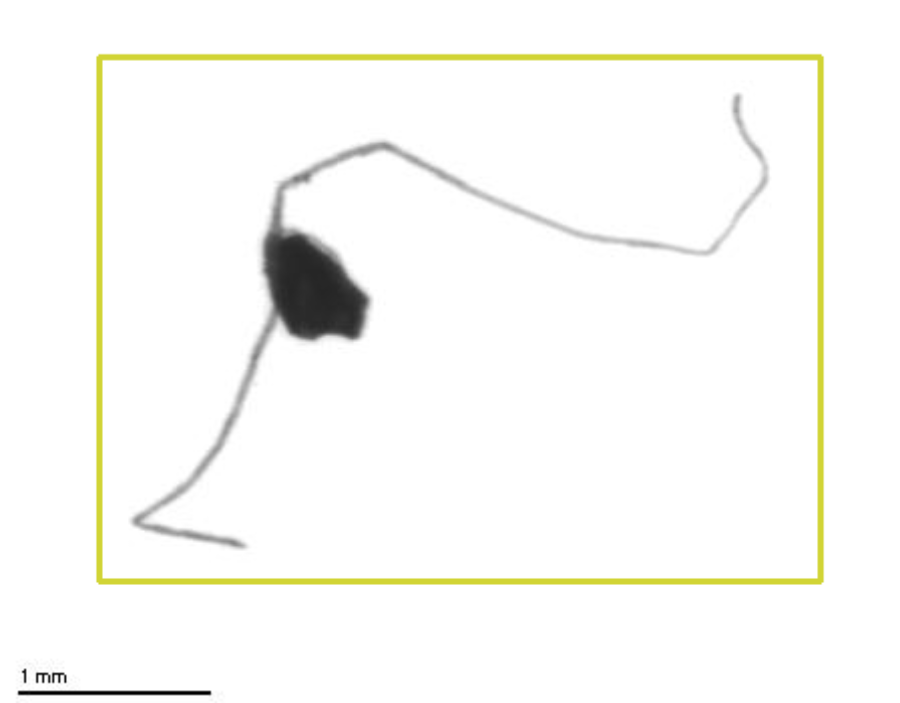

In [11]:
!pip install supervision==0.24.0 -q

import supervision as sv
import cv2

# Convert YOLO results to supervision format
detections = sv.Detections.from_ultralytics(results[0])

# Use BoxAnnotator for YOLOv8n detection (not oriented boxes)
box_annotator = sv.BoxAnnotator()

# Draw bounding boxes on the image
annotated_frame = box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

# Resize for display
annotated_frame = sv.resize_image(
    annotated_frame,
    resolution_wh=(900, 900),
    keep_aspect_ratio=True
)

# Convert to PIL image for notebook display
sv.cv2_to_pillow(annotated_frame)

In [ ]:
model.export(format='tflite', imgsz=640, int8=False)  # No quantization